<a href="https://colab.research.google.com/github/RakshithSuresh/ML-Projects/blob/main/titanic_survivers(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [19]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# checking for collinearity between Pclass and fare variables
df[['Pclass', 'Fare']].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assume df has 'Pclass' and 'Fare'
X = add_constant(df[['Pclass', 'Fare']])
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Feature        VIF
0   const  15.358041
1  Pclass   1.432562
2    Fare   1.432562


In [22]:
# checking for null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))
df['Age'] = df['Age'].round().astype(int)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
# dropping irrelevant features
df.drop(['PassengerId', 'Name', 'SibSp','Ticket', 'Cabin','Embarked'], axis=1, inplace=True)
df.drop('Parch',axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22,7.2500
1,1,1,female,38,71.2833
2,1,3,female,26,7.9250
3,1,1,female,35,53.1000
4,0,3,male,35,8.0500


In [32]:
# encoding by Mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22,7.2500
1,1,1,1,38,71.2833
2,1,3,1,26,7.9250
3,1,1,1,35,53.1000
4,0,3,0,35,8.0500


In [33]:
# assigning and X and y
X = df.drop('Survived', axis=1)
y = df['Survived']

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# building decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# predictor
y_pred = dt.predict(X_test)

In [40]:
# evaluating model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7486033519553073
[[82 23]
 [22 52]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       105
           1       0.69      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



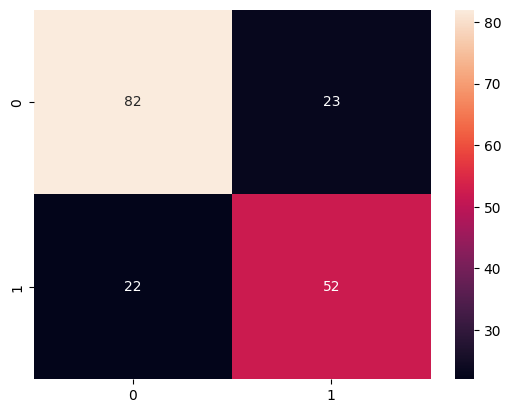

In [45]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()